# Import the Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

# Import the Dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values    

# Spiting the Dataset into training and testing set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=0)

In [4]:
# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)

# Features Scaling 

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [6]:
# print(X_train)
# print(X_test)

# Training the LR Model on the Training Set

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# Predict a New Value

In [8]:
print(classifier.predict(sc.transform([[30, 87000]])))  # Predicting a new result with Logistic Regression that needs to be scaled 

[0]


# Predict the Testing set

In [9]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)) # Comparing the result with the actual values  

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


# Making the Confusion Matrix

In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)   
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))  # Accuracy of the model

[[65  3]
 [ 8 24]]
Accuracy: 89.00%


# Visualizing the Training Set Results

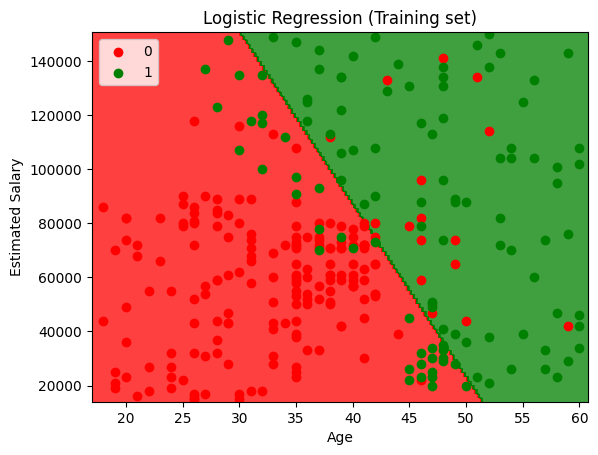

In [ ]:
# Visualising the Training set results (with original feature values)
from matplotlib.colors import ListedColormap

# Inverse transform the scaled training data to original scale
X_set, y_set = sc.inverse_transform(X_train), y_train

# Create meshgrid in original feature space
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.25), # Adjust step size as needed
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=250) # Adjust step size as needed
)

# Predict using the classifier, but scale the grid points first
Z = classifier.predict(
    sc.transform(np.array([X1.ravel(), X2.ravel()]).T)
).reshape(X1.shape)

plt.contourf(
    X1, X2, Z,
    alpha=0.75, cmap=ListedColormap(('red', 'green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot original (unscaled) training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        color=['red', 'green'][i], label=j
    )
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualizing the Testing Set Results

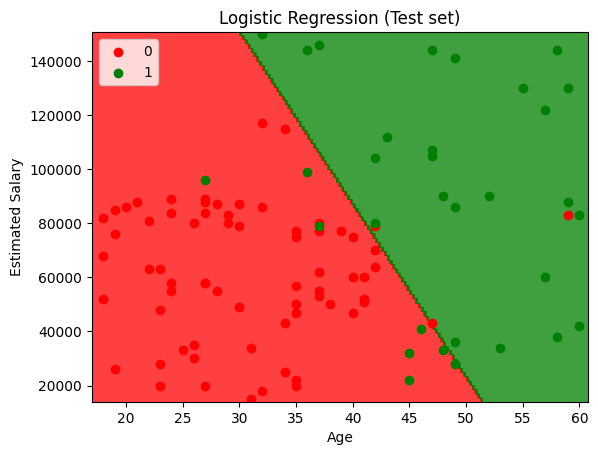

In [17]:
# Visualising the rescaled Testing set results
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.25),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=250)
)

# Predict using the classifier, but scale the grid points first 
Z = classifier.predict(
    sc.transform(np.array([X1.ravel(), X2.ravel()]).T)
).reshape(X1.shape)

# Plotting the decision boundary
plt.contourf(
    X1, X2, Z,
    alpha=0.75, cmap=ListedColormap(('red', 'green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())    
# Plot original (unscaled) testing points
for i, j in enumerate(np.unique(y_set)):
    color = ['red', 'green'][i]
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        color=color, label=j
    )
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
